In [1]:
import pandas as pd
import numpy as np # Vamos precisar do numpy para tratar os nulos

# definindo os nomes das 14 colunas principais
column_names = [
    'age', 
    'sex', 
    'cp', 
    'trestbps', 
    'chol', 
    'fbs', 
    'restecg', 
    'thalach', 
    'exang', 
    'oldpeak', 
    'slope', 
    'ca', 
    'thal', 
    'num' # nossa coluna alvo (diagnóstico)
]

# Carregar os dados. 
# O parâmetro 'na_values="?"' é o primeiro passo da limpeza:
# Ele "ensina" o pandas a reconhecer '?' como um valor nulo (NaN).
df_heart = pd.read_csv('../data/raw/processed.cleveland.data', 
                       header=None, 
                       names=column_names, 
                       na_values='?')

print("Amostra dos dados (com '?' já convertidos para 'NaN'):")
display(df_heart.head())

Amostra dos dados (com '?' já convertidos para 'NaN'):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
print("--- Informações Gerais (Antes da Limpeza) ---")
df_heart.info()

print("\n\n--- Contagem de Valores Nulos por Coluna ---")
# atraves do 'na_values' podemos ver a contagem exata de dados faltantes
print(df_heart.isnull().sum())

--- Informações Gerais (Antes da Limpeza) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


--- Contagem de Valores Nulos por Coluna ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0


In [3]:
# importando as bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns # 

# configurando o estilo padrão dos gráficos
sns.set_theme(style="whitegrid")

In [4]:
print(f"Formato original (linhas, colunas): {df_heart.shape}")

# 'dropna()' remove qualquer linha que contenha pelo menos um valor NaN
# 'inplace=True' aplica a mudança diretamente ao DataFrame 'df_heart'
df_heart.dropna(inplace=True)

print(f"Formato após limpeza (linhas, colunas): {df_heart.shape}")

print("\n--- Verificação de Nulos (Após Limpeza) ---")
# a contagem agora deve ser zero para todas as colunas
print(df_heart.isnull().sum())

Formato original (linhas, colunas): (303, 14)
Formato após limpeza (linhas, colunas): (297, 14)

--- Verificação de Nulos (Após Limpeza) ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [5]:
# 1. simplificar a coluna alvo 'num'
# (df_heart['num'] > 0) cria uma série de True/False.
#.astype(int) converte True para 1 e False para 0.
df_heart['num'] = (df_heart['num'] > 0).astype(int)

# 2. converter colunas para o tipo 'category'
# O .info() original nos mostrou quais colunas são categóricas
colunas_para_converter = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']

for col in colunas_para_converter:
    df_heart[col] = df_heart[col].astype('category')

print("--- Informações (Após Transformação de Tipos) ---")
# verifique como os 'Dtype' (tipos) mudaram
df_heart.info()

--- Informações (Após Transformação de Tipos) ---
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       297 non-null    float64 
 1   sex       297 non-null    category
 2   cp        297 non-null    category
 3   trestbps  297 non-null    float64 
 4   chol      297 non-null    float64 
 5   fbs       297 non-null    category
 6   restecg   297 non-null    category
 7   thalach   297 non-null    float64 
 8   exang     297 non-null    category
 9   oldpeak   297 non-null    float64 
 10  slope     297 non-null    category
 11  ca        297 non-null    category
 12  thal      297 non-null    category
 13  num       297 non-null    category
dtypes: category(9), float64(5)
memory usage: 17.8 KB


In [6]:
print("--- Resumo Estatístico (Variáveis Numéricas) ---")
# o .describe() agora só analisa as 5 colunas que deixamos como numéricas
display(df_heart.describe())

print("\n\n--- Resumo Estatístico (Variáveis Categóricas) ---")
# podemos usar o .describe() para as colunas do tipo 'category'
display(df_heart.describe(include=['category']))

--- Resumo Estatístico (Variáveis Numéricas) ---


,age,trestbps,chol,thalach,oldpeak
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556
std,9.049736,17.762806,51.997583,22.941562,1.166123
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000
75%,61.000000,140.000000,276.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000




--- Resumo Estatístico (Variáveis Categóricas) ---


,sex,cp,fbs,restecg,exang,slope,ca,thal,num
count,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297.0,297
unique,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,2
top,1.0,4.0,0.0,0.0,0.0,1.0,0.0,3.0,0
freq,201.0,142.0,254.0,147.0,200.0,139.0,174.0,164.0,160


--- Histogramas (Variáveis Numéricas) ---


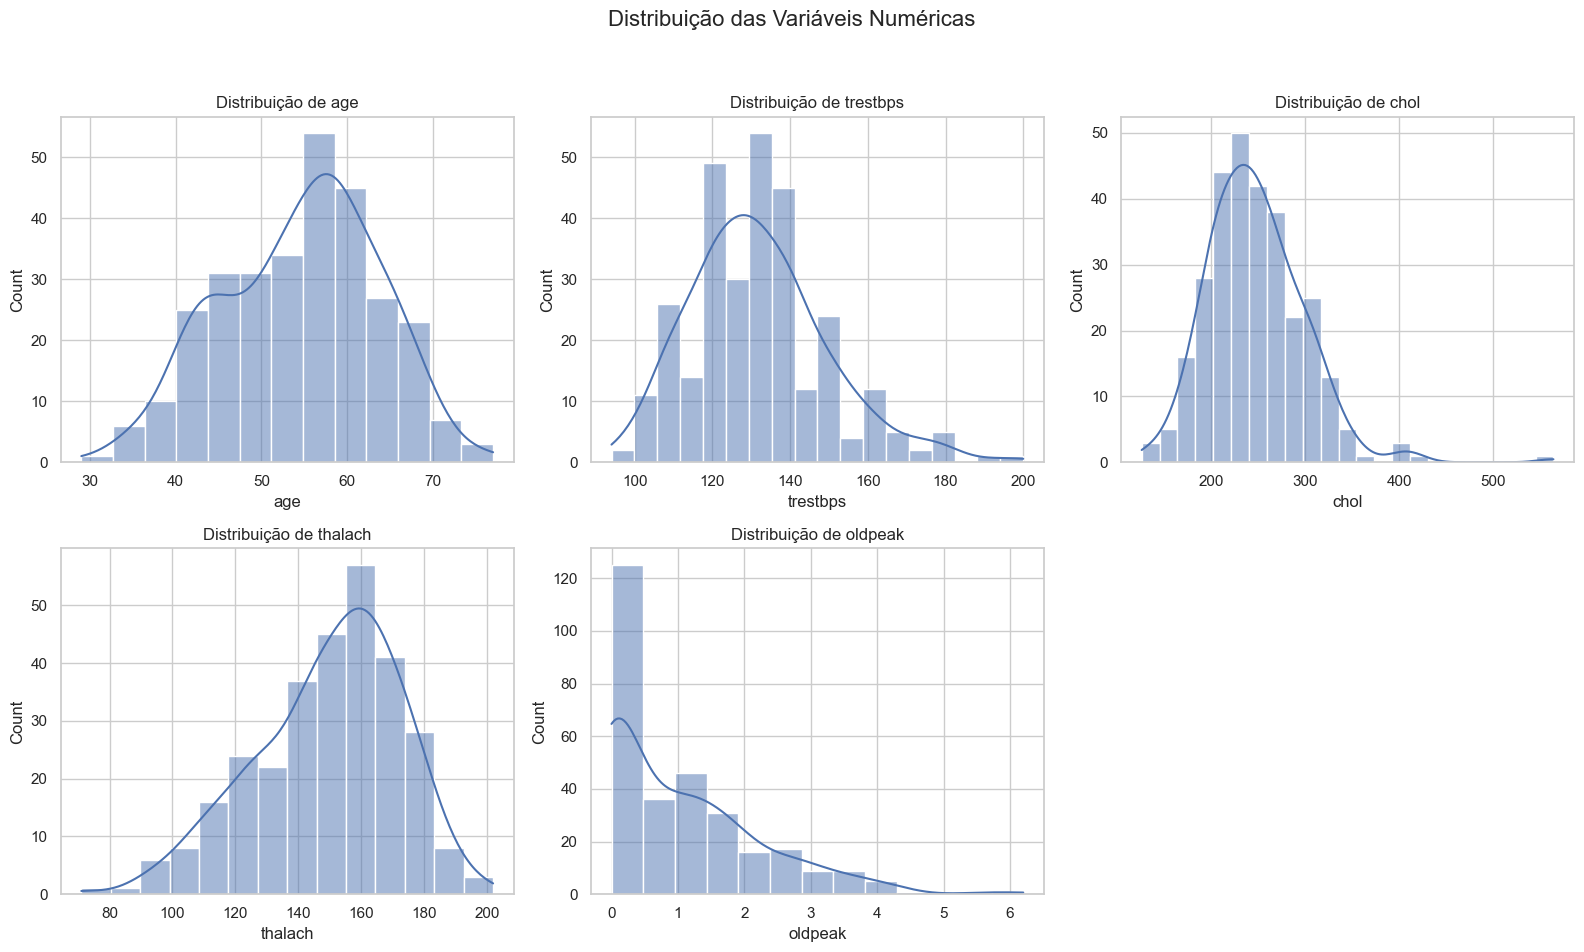

In [7]:
print("--- Histogramas (Variáveis Numéricas) ---")

# selecionando apenas as colunas numéricas
colunas_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# criando a figura e os eixos (subplots)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)

# achatando o array de eixos para facilitar o loop
axes = axes.flatten()

# criando um histograma para cada coluna numérica
for i, col in enumerate(colunas_numericas):
    sns.histplot(df_heart[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}')

# removendo o último eixo que não será usado (pois temos 5 gráficos em uma grade 2x3)
fig.delaxes(axes[5])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

--- Gráficos de Barras (Variáveis Categóricas) ---


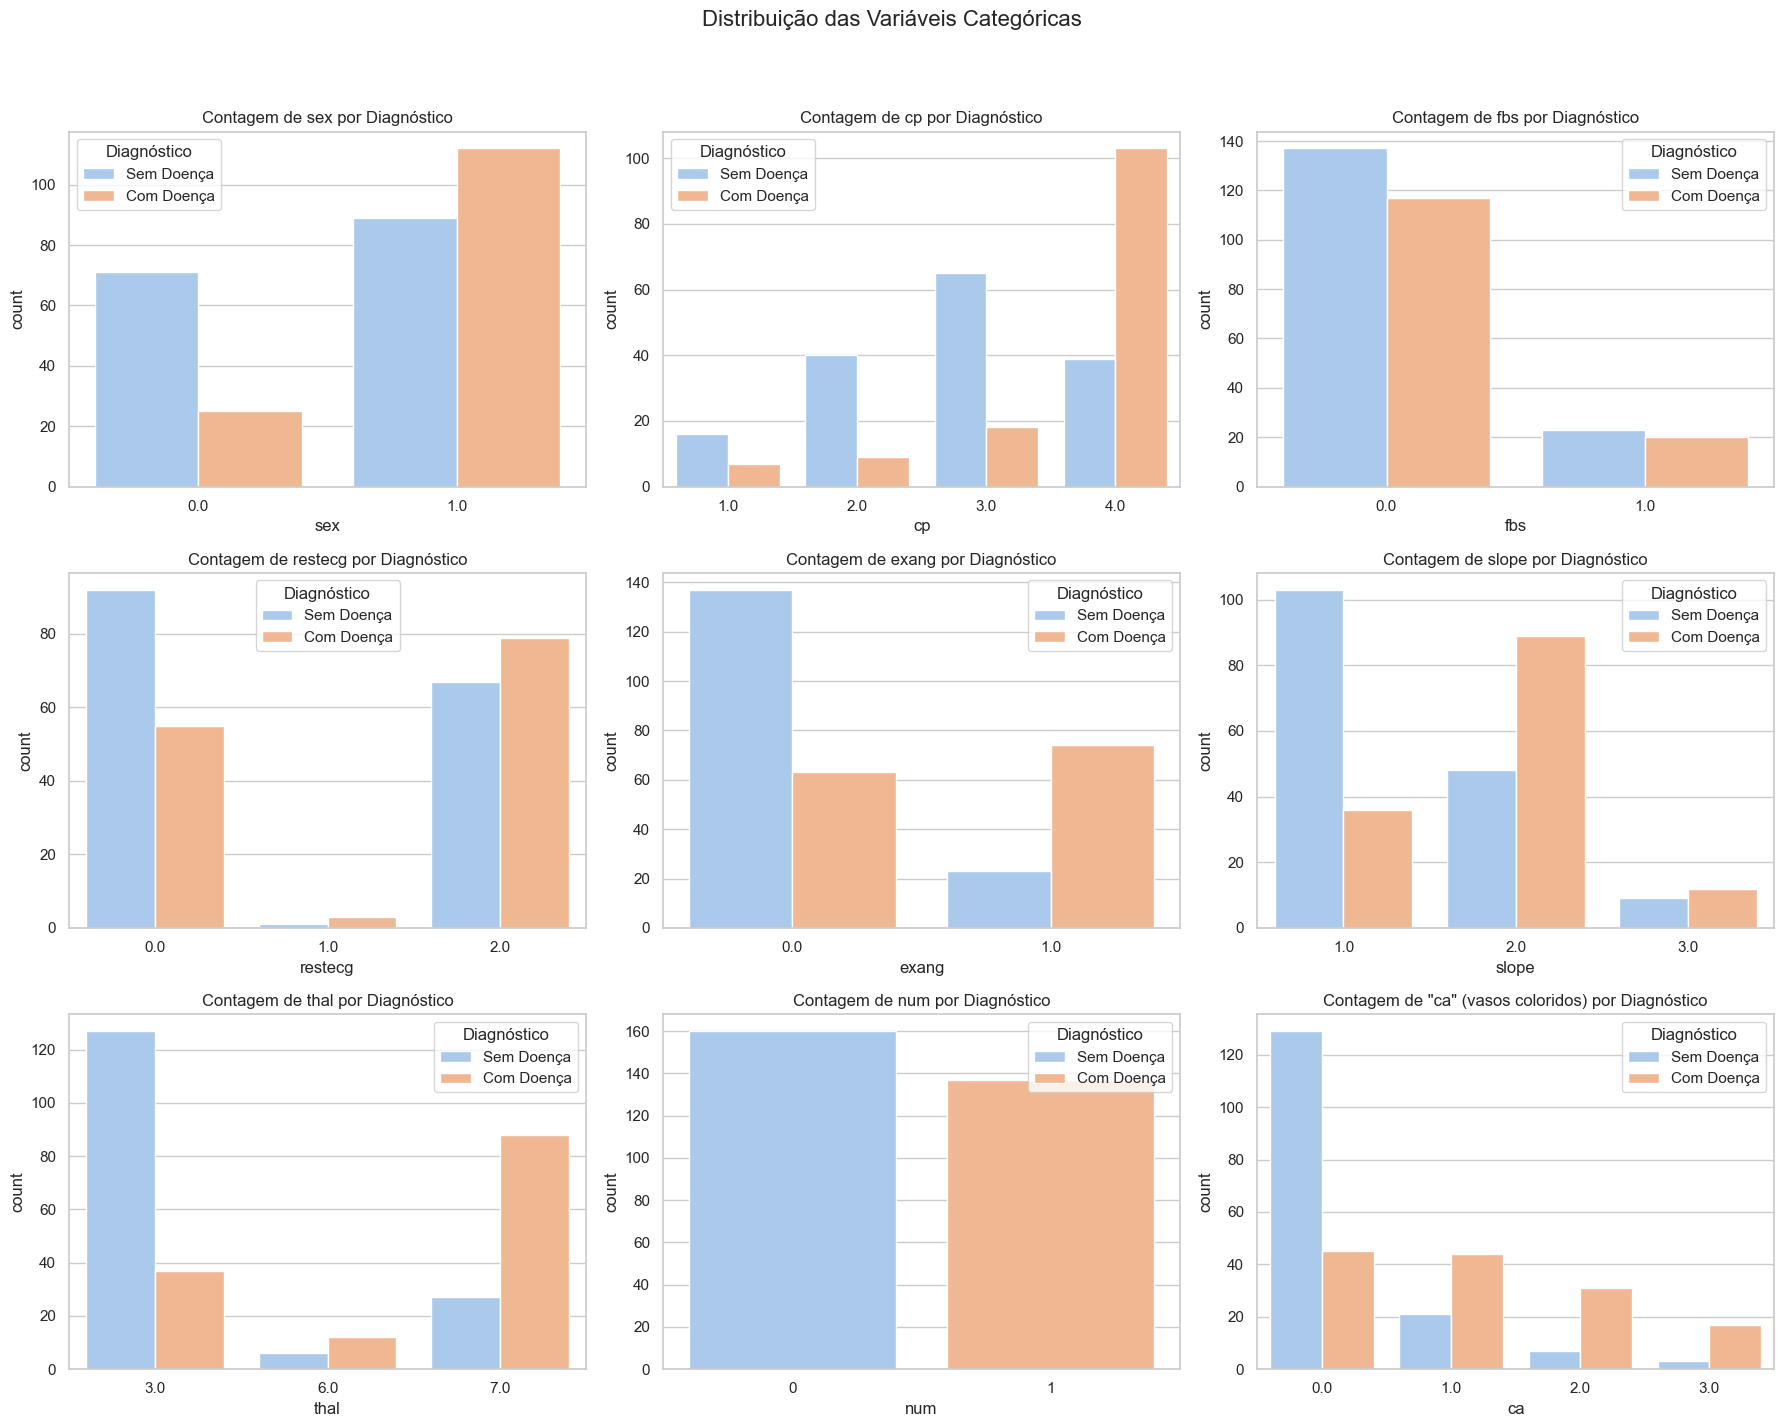

In [8]:
print("--- Gráficos de Barras (Variáveis Categóricas) ---")

# selecionando as colunas categóricas que queremos plotar
colunas_categoricas_plot = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']

# criando a figura e os eixos (subplots)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.suptitle('Distribuição das Variáveis Categóricas', fontsize=16)
axes = axes.flatten()

# criando um gráfico de barras (countplot) para cada coluna
for i, col in enumerate(colunas_categoricas_plot):
    # O 'hue="num"' adiciona uma segunda dimensão: colore as barras por diagnóstico
    # Isso já nos dá uma pista da Análise Bivariada.
    sns.countplot(x=col, data=df_heart, ax=axes[i], hue='num', palette='pastel')
    axes[i].set_title(f'Contagem de {col} por Diagnóstico')
    axes[i].legend(title='Diagnóstico', labels=['Sem Doença', 'Com Doença'])

# a coluna 'ca' (número de vasos) é categórica, mas tem 4 valores. Vamos dar um gráfico só para ela.
sns.countplot(x='ca', data=df_heart, ax=axes[8], hue='num', palette='pastel')
axes[8].set_title('Contagem de "ca" (vasos coloridos) por Diagnóstico')
axes[8].legend(title='Diagnóstico', labels=['Sem Doença', 'Com Doença'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

--- Matriz de Correlação (Heatmap) ---


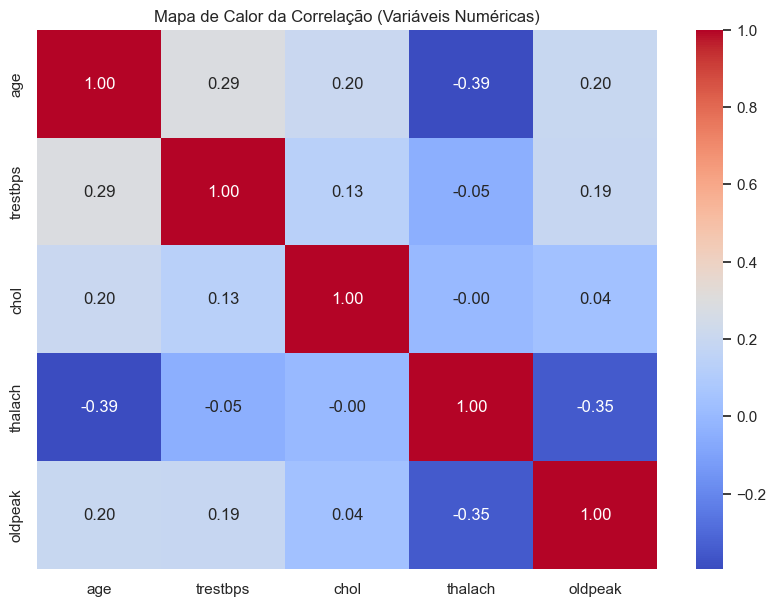

In [9]:
print("--- Matriz de Correlação (Heatmap) ---")
# a correlação só funciona em dados numéricos.

corr_matrix = df_heart.corr(numeric_only=True)

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor da Correlação (Variáveis Numéricas)')
plt.show()

--- Box Plots (Numéricas vs. Diagnóstico) ---


C:\Users\Admin\AppData\Local\Temp\ipykernel_4056\2237775385.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=col, data=df_heart, ax=axes[i], palette='pastel')
C:\Users\Admin\AppData\Local\Temp\ipykernel_4056\2237775385.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Sem Doença', 'Com Doença']) # Renomeia os eixos
C:\Users\Admin\AppData\Local\Temp\ipykernel_4056\2237775385.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=col, data=df_heart, ax=axes[i], palette='pastel')
C:\Users\Admin\AppData\Local\Temp\ipykernel_4056\2237775385.py:13: UserWarning:

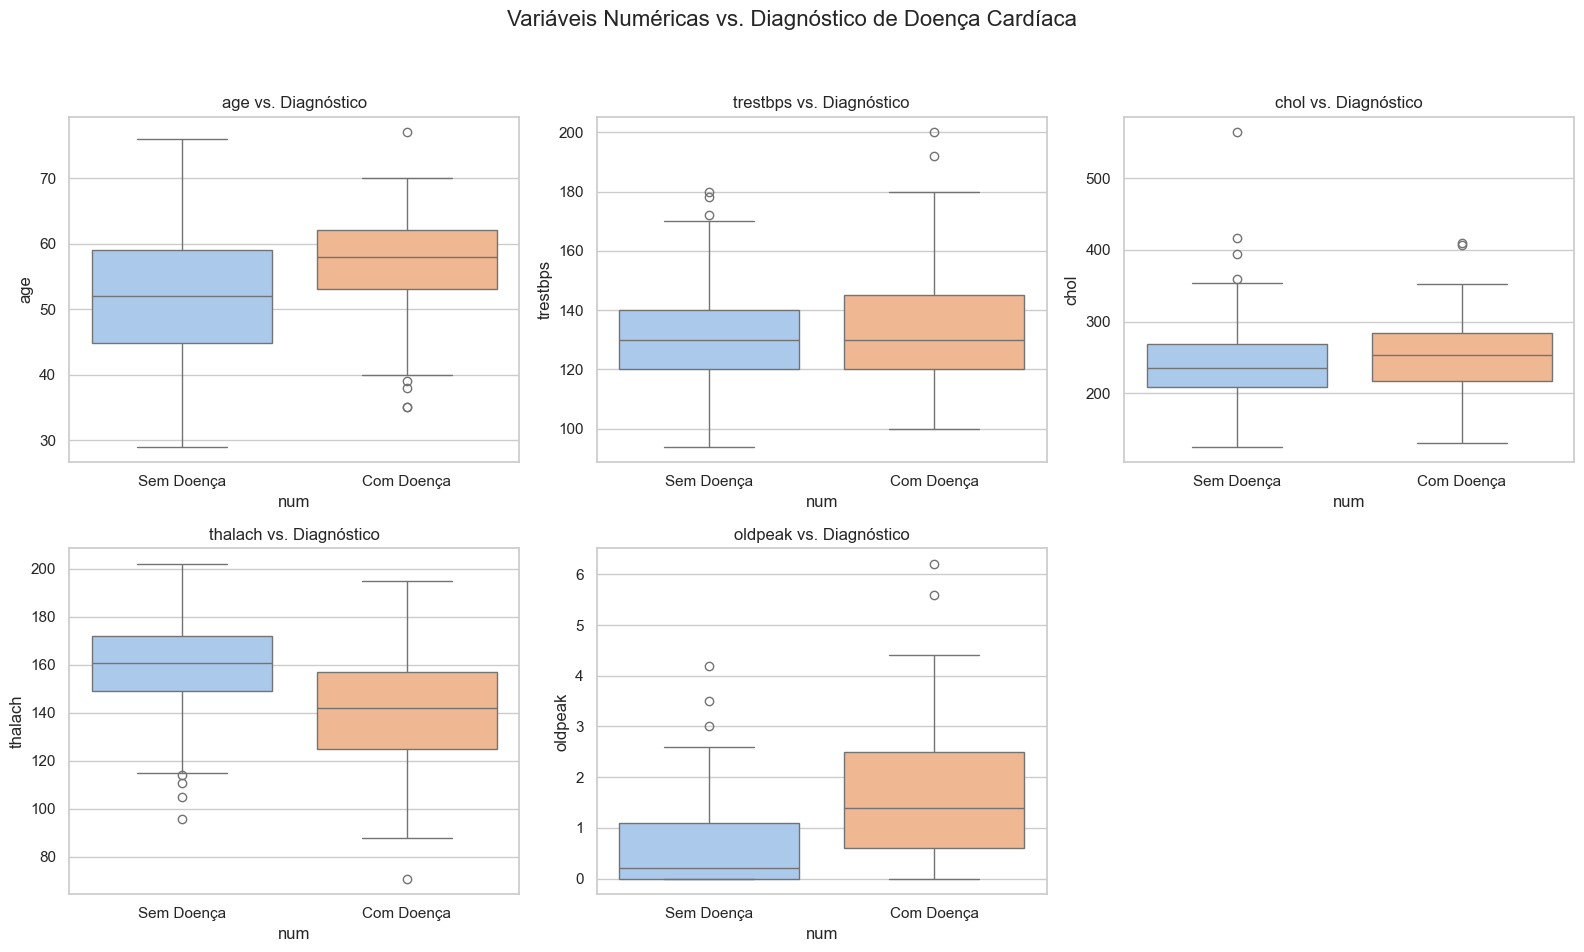

In [10]:
print("--- Box Plots (Numéricas vs. Diagnóstico) ---")
# esta é a visualização bivariada mais importante:
# como as variáveis numéricas mudam entre pacientes saudáveis (0) e doentes (1)?

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig.suptitle('Variáveis Numéricas vs. Diagnóstico de Doença Cardíaca', fontsize=16)
axes = axes.flatten()

# criando um box plot para cada coluna numérica, separando pela coluna 'num'
for i, col in enumerate(colunas_numericas):
    sns.boxplot(x='num', y=col, data=df_heart, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{col} vs. Diagnóstico')
    axes[i].set_xticklabels(['Sem Doença', 'Com Doença']) # Renomeia os eixos

fig.delaxes(axes[5]) # removendo o eixo vazio
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

--- Gráfico de Dispersão (Idade vs. Freq. Cardíaca Máx.) ---


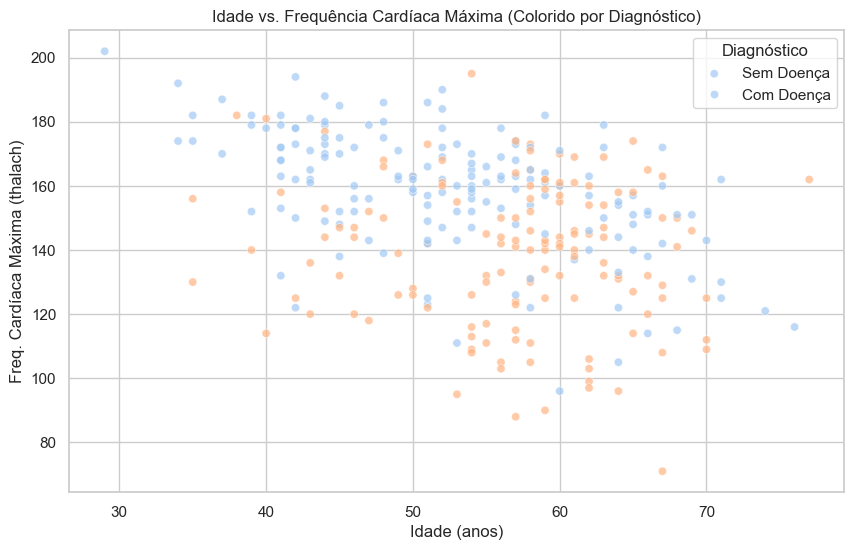

In [11]:
print("--- Gráfico de Dispersão (Idade vs. Freq. Cardíaca Máx.) ---")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='num', data=df_heart, alpha=0.7, palette='pastel')
plt.title('Idade vs. Frequência Cardíaca Máxima (Colorido por Diagnóstico)')
plt.xlabel('Idade (anos)')
plt.ylabel('Freq. Cardíaca Máxima (thalach)')
plt.legend(title='Diagnóstico', labels=['Sem Doença', 'Com Doença'])
plt.show()

Pessoas mais velhas têm mais chance de ter doença cardíaca?

Sim. O gráfico "Box Plots" para age vs. Diagnóstico mostra que a caixa dos pacientes "Com Doença" (1) está visivelmente mais alta no eixo de idade do que a caixa dos pacientes "Sem Doença" (0). A mediana de idade de quem tem a doença é maior.

Pacientes com doença cardíaca (num=1) tendem a ter uma frequência cardíaca máxima (thalach) menor?

Sim. O Box Plot thalach vs. Diagnóstico mostra claramente que a mediana (a linha no meio da caixa) dos pacientes "Com Doença" (1) é significativamente mais baixa do que a dos pacientes "Sem Doença" (0). O gráfico de dispersão reforça isso, mostrando que os pontos azuis ("Sem Doença") estão, em geral, mais altos (maior thalach) que os pontos laranjas ("Com Doença").